## Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('seoulcleandata.csv')
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  Spring                  

## Split data for training & Testing

In [4]:
x = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (7008, 22)
x_test: (1752, 22)
y_train: (7008,)
y_test: (1752,)


## Feature Scaling convert into 1 unit for all data

In [5]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test =  sc.transform(x_test)

## Training ML Model

### Linear Ligression Model

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [7]:
# test data given to predict
y_pred = lr.predict(x_test)

## Model Evaluation

In [8]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)
print("R2:",R2)

MSE: 193512.99662765593
RMSE: 439.9011214212302
MAE: 330.88435776244006
R2: 0.5355460361481215


### we are going to avoid this model beacause all error are not near to 1 so model is not great.

In [9]:
def get_metrics(y_test,y_pred,model_name):
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)

    print(f"{model_name}:['MSE':{round(MSE,3)},'RMSE':{round(RMSE,3)},'MAE':{round(MAE,3)},'R2':{round(R2,3)}]")

In [10]:
get_metrics(y_test,y_pred,"LinearRegression")

LinearRegression:['MSE':193512.997,'RMSE':439.901,'MAE':330.884,'R2':0.536]


## Train Multiple Model

In [11]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [12]:
rir = Ridge().fit(x_train,y_train)
y_pred_rir = rir.predict(x_test)

lar = Lasso().fit(x_train,y_train)
y_pred_lar = lar.predict(x_test)

poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

poly_r = LinearRegression().fit(x_train_poly,y_train)
y_pred_poly = poly_r.predict(x_test_poly)

svr = SVR().fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)

knnr = KNeighborsRegressor().fit(x_train,y_train)
y_pred_knnr = knnr.predict(x_test)

dtr = DecisionTreeRegressor().fit(x_train,y_train)
y_pred_dtr = dtr.predict(x_test)

rfr = RandomForestRegressor().fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)

xgbr = XGBRegressor().fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)

In [13]:
get_metrics(y_test,y_pred_rir,"Ridge")
get_metrics(y_test,y_pred_lar,"Lasso")
get_metrics(y_test,y_pred_poly,"PolynomialFeatures")
get_metrics(y_test,y_pred_svr,"SVR")
get_metrics(y_test,y_pred_knnr,"KNeighborsRegressor")
get_metrics(y_test,y_pred_dtr,"DecisionTreeRegressor")
get_metrics(y_test,y_pred_rfr,"RandomForestRegressor")
get_metrics(y_test,y_pred_xgbr,"XGBRegressor")

Ridge:['MSE':193510.523,'RMSE':439.898,'MAE':330.875,'R2':0.536]
Lasso:['MSE':193300.12,'RMSE':439.659,'MAE':330.329,'R2':0.536]
PolynomialFeatures:['MSE':131644.471,'RMSE':362.828,'MAE':247.913,'R2':0.684]
SVR:['MSE':329832.053,'RMSE':574.31,'MAE':391.511,'R2':0.208]
KNeighborsRegressor:['MSE':122330.116,'RMSE':349.757,'MAE':221.428,'R2':0.706]
DecisionTreeRegressor:['MSE':87299.187,'RMSE':295.464,'MAE':167.074,'R2':0.79]
RandomForestRegressor:['MSE':45815.566,'RMSE':214.046,'MAE':125.951,'R2':0.89]
XGBRegressor:['MSE':36147.775,'RMSE':190.126,'MAE':118.585,'R2':0.913]


## Visualise the Model

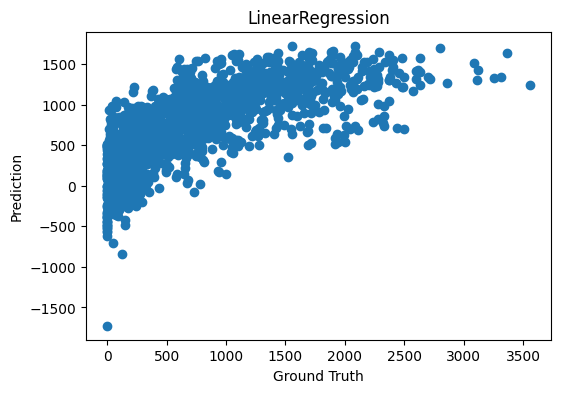

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred)
plt.title("LinearRegression")
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

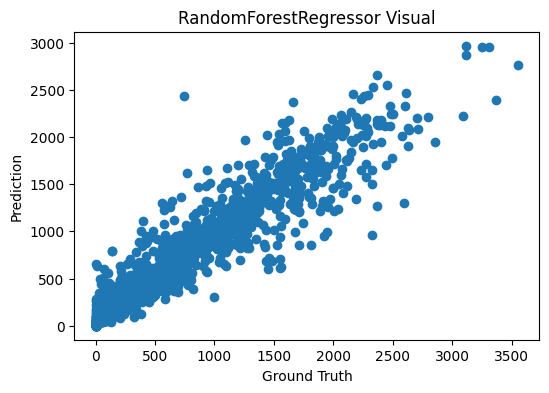

In [15]:
# random forest regressor
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred_rfr)
plt.title("RandomForestRegressor Visual")
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

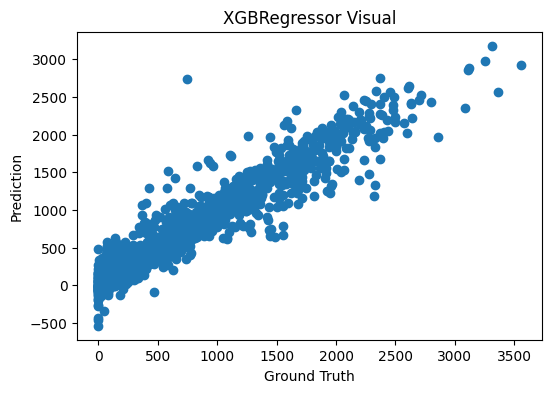

In [16]:
# XGBRegressor
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred_xgbr)
plt.title("XGBRegressor Visual")
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

## Hyperparameter Tuning for Random Forest Regressor
* RandomizedSearchCV
* GridSearch

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10,120,num=12)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

# Method of selecting samples for each training tree
bootstrap = [True,False]

# Create the random grid
random_grid = {'n_estimators':n_estimators,
                'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
                'min_samples_leaf':min_samples_leaf,
                'bootstrap':bootstrap
}

In [18]:
import time
start_time = time.time()
rf = RandomForestRegressor()
# Random search of parameter, using 3 fold cross validation
# Search across 100 different combinations, use all available cores
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
# Fit the random search model
rf_random.fit(x_train,y_train)
y_pred_rf_random = rf_random.predict(x_test)
print("Time taken to training using randomize search : ",time.time()-start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Time taken to training using randomize search :  208.6143035888672


In [19]:
get_metrics(y_test,y_pred_rf_random,"RandomForestRegressor")

RandomForestRegressor:['MSE':43537.514,'RMSE':208.656,'MAE':125.845,'R2':0.896]


## Hyperparameter Tuning for XGBRegressor
* RandomizedSearchCV
* GridSearch

In [20]:
import time
start_time = time.time()

params = {'n_estimators':[100,500,1000],
         'learning_rate':[0.01,0.1,0.2,0.3],
         'subsample': np.arange(0.5,1.0,0.1),
         'colsample_bytree':np.arange(0.4,1.0,0.1),
         'colsample_bylevel':np.arange(0.4,1.0,0.1),
        'max_depth':[3,5,6,10,15,20]          
}
xgbr = XGBRegressor(seed=20)
# Search across 25 different combinations, use all available cores
rscv = RandomizedSearchCV(estimator=xgbr,param_distributions=params,scoring='neg_mean_squared_error',n_iter=25,cv=5,verbose=1)

# Fit the random search model
rscv.fit(x_train,y_train)
y_pred_xgb_random = rscv.predict(x_test)
print("Time taken to training using randomize search : ",time.time()-start_time)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Time taken to training using randomize search :  302.7847058773041


In [21]:
get_metrics(y_test,y_pred_xgb_random,"XGBRegressor")
print('Best Parameters: ',rscv.best_params_)

XGBRegressor:['MSE':33353.797,'RMSE':182.63,'MAE':113.172,'R2':0.92]
Best Parameters:  {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.4}


In [22]:
xgbr = XGBRegressor(subsample=0.5,
                   n_estimators=1000,
                   max_depth=6,
                   learning_rate=0.091,
                   colsample_bytree=0.9,
                   colsample_bylevel=0.9)
xgbr.fit(x_train,y_train)
y_pred_tuned = xgbr.predict(x_test)
get_metrics(y_test,y_pred_tuned,"XGBRegressor with best params")

XGBRegressor with best params:['MSE':30412.761,'RMSE':174.393,'MAE':104.561,'R2':0.927]


## Save ML Best Model

In [23]:
import pickle
import os

dir = r'Z:\project\Seoul Bike Prediction'
model_file_name = "XGBoost_regressor_r2_0.927_v1.pkl"
model_file_path = os.path.join(dir,model_file_name)

In [24]:
model_file_path
pickle.dump(xgbr,open(model_file_path,"wb"))

In [25]:
x_test[0,:]

array([-0.50839691,  1.1998884 ,  0.52836228,  0.06680005,  0.9210637 ,
        0.14200505, -0.13401915, -0.17102636, -0.22996655,  0.18708879,
       -0.87815509,  1.01127504,  0.30179287, -0.58569899,  1.73073366,
       -0.56834235,  2.53140945, -0.41106465, -0.42003701, -0.40559398,
       -0.41153889, -0.41272349])

In [26]:
x_test[1,:]

array([ 0.07092757,  1.65407403, -0.35217637,  0.3562486 , -1.04340087,
        3.01478263, -0.13401915, -0.17102636, -0.22996655,  0.18708879,
        0.48566198,  0.14070562,  0.30179287, -0.58569899,  1.73073366,
       -0.56834235, -0.39503684, -0.41106465, -0.42003701, -0.40559398,
       -0.41153889, -0.41272349])

In [27]:
y_test

6056    1728
5556     822
5990     658
7674    2716
3319    1083
        ... 
8307     122
100       42
6605     179
1783     294
6013     673
Name: Rented Bike Count, Length: 1752, dtype: int64

## Dump sacling parameter

In [28]:
sc_dump_path = r"Z:\project\Seoul Bike Prediction\sc.pkl"
pickle.dump(sc,open(sc_dump_path,"wb"))

In [ ]:
df['']